# Classification Random Forest

In [1]:
import pickle
from sklearn.cross_validation import train_test_split
from sklearn.metrics import confusion_matrix
import pandas as pd
from statsmodels.formula.api import logit, probit, poisson, ols
from sklearn.metrics import roc_curve
from sklearn import metrics
from sklearn import svm
from sklearn.cross_validation  import cross_val_score
import numpy as np
from sklearn.ensemble import RandomForestClassifier
import statsmodels.api as sm
import os
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation  import cross_val_score

C:\Users\visha\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [43]:
MATRIXPATH="C:/Users/visha/Desktop/MSIS/Advanced Data Science/Assignments/MIDTERM/Part2/ClassificationMetrics.csv"
MAINPATH="C:/Users/visha/Desktop/MSIS/Advanced Data Science/Assignments/MIDTERM/Part2/temp"
TRAINFILENAME="clean_historical_data1_time_Q12005.txt.0"
TESTFILENAME="clean_historical_data1_time_Q22005.txt.0"

In [22]:
Train_DF = pd.read_csv(MAINPATH+"/"+TRAINFILENAME,index_col=None)

In [23]:
Train_DF.head()

,LOAN_SEQ_NO,MONTHLY_REPORT_PERIOD,CUR_ACT_UPB,CUR_LOAN_DELQ_STAT,LOAN_AGE,MONTHS_LEGAL_MATURITY,CURR_INTERESTRATE,CURR_DEF_UPB,DELINQUENT
0,F105Q1000001,200504,190000.0,0,0,360,5.625,0.0,0
1,F105Q1000001,200505,190000.0,0,1,359,5.625,0.0,0
2,F105Q1000001,200506,190000.0,0,2,358,5.625,0.0,0
3,F105Q1000001,200507,189000.0,0,3,357,5.625,0.0,0
4,F105Q1000001,200508,189000.0,0,4,356,5.625,0.0,0


In [24]:
traincols=['LOAN_SEQ_NO','MONTHLY_REPORT_PERIOD','CUR_ACT_UPB','CUR_LOAN_DELQ_STAT','LOAN_AGE','MONTHS_LEGAL_MATURITY','CURR_INTERESTRATE','CURR_DEF_UPB','DELINQUENT']
traincols=['MONTHLY_REPORT_PERIOD','CUR_ACT_UPB','LOAN_AGE','MONTHS_LEGAL_MATURITY','CURR_INTERESTRATE','CURR_DEF_UPB']

In [25]:
y_train=Train_DF['DELINQUENT']
Train_DF=Train_DF[traincols]

In [26]:
Test_DF=pd.read_csv(MAINPATH+"/"+TESTFILENAME,index_col=None)

In [27]:
testcols=['MONTHLY_REPORT_PERIOD','CUR_ACT_UPB','CUR_LOAN_DELQ_STAT','LOAN_AGE','MONTHS_LEGAL_MATURITY','CURR_INTERESTRATE','CURR_DEF_UPB','DELINQUENT']
testcols=['MONTHLY_REPORT_PERIOD','CUR_ACT_UPB','LOAN_AGE','MONTHS_LEGAL_MATURITY','CURR_INTERESTRATE','CURR_DEF_UPB']


In [31]:
y_test=Test_DF['DELINQUENT']
Test_DF=Test_DF[testcols]

In [28]:
#clf = RandomForestClassifier(n_estimators=20,verbose =1,min_samples_split=2)
#clf = clf.fit(Train_DF, y_train)

In [29]:
clf = RandomForestClassifier(n_estimators=20,verbose =1,min_samples_split=10)
clf = clf.fit(Train_DF, y_train)

[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:  9.0min finished


## Train Accuracy

In [43]:
print(clf.score(Train_DF,y_train))

[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:  1.2min finished


0.971850857143


## Test Accuracy

In [33]:
pred = clf.predict(Test_DF)

[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:   40.1s finished


In [34]:
metrics.accuracy_score(y_test,pred)

0.94709971428571427

In [37]:
#pd.crosstab(pred, y_test,rownames=['pred'],colnames=['ytest'])
confusion_matrix(y_test, pred, labels=None, sample_weight=None)

array([[6606972,   41808],
       [ 328494,   22726]])

In [39]:
preds = clf.predict_proba(Test_DF)[:,1]
fpr,tpr, _ = roc_curve(y_test,preds)

[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:   39.9s finished


## ROC Curve

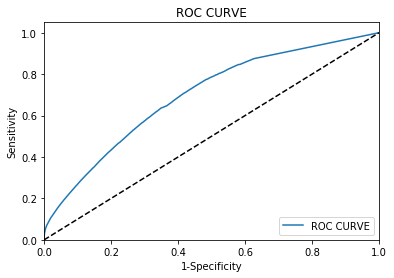

In [40]:
import matplotlib.pylab as plt

plt.figure()
plt.plot(fpr,tpr,label= "ROC CURVE")
plt.plot([0,1],[0,1],'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('1-Specificity')
plt.ylabel('Sensitivity')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

In [14]:
from matplotlib import pyplot as plt

In [44]:
evalmatrix_df=pd.read_csv(MATRIXPATH)
evalmatrix_df.index=evalmatrix_df['Quarter']
evalmatrix_df

,Quarter,NumActualDelinquents,NumOfPredictedDelinquents,NumRecordsInDataset,NumDelinquentsProperlyClassified,NumNonDelinquentsImproperlyClassified
Quarter,,,,,,
Q21999,Q21999,202868,202868,7000000,6300,11388
Q41999,Q41999,270684,270684,6133986,10562,19293
Q12000,Q12000,185631,185631,3939565,8486,16418
Q22000,Q22000,255207,255207,5056705,14922,29630
Q32000,Q32000,275979,275979,5570045,15075,24623
Q42000,Q42000,318650,318650,6105572,15328,24931
Q12001,Q12001,239303,239303,7000000,7287,13813
Q22001,Q22001,245489,245489,7000000,8728,14932
Q32001,Q32001,246858,246858,7000000,8152,11068


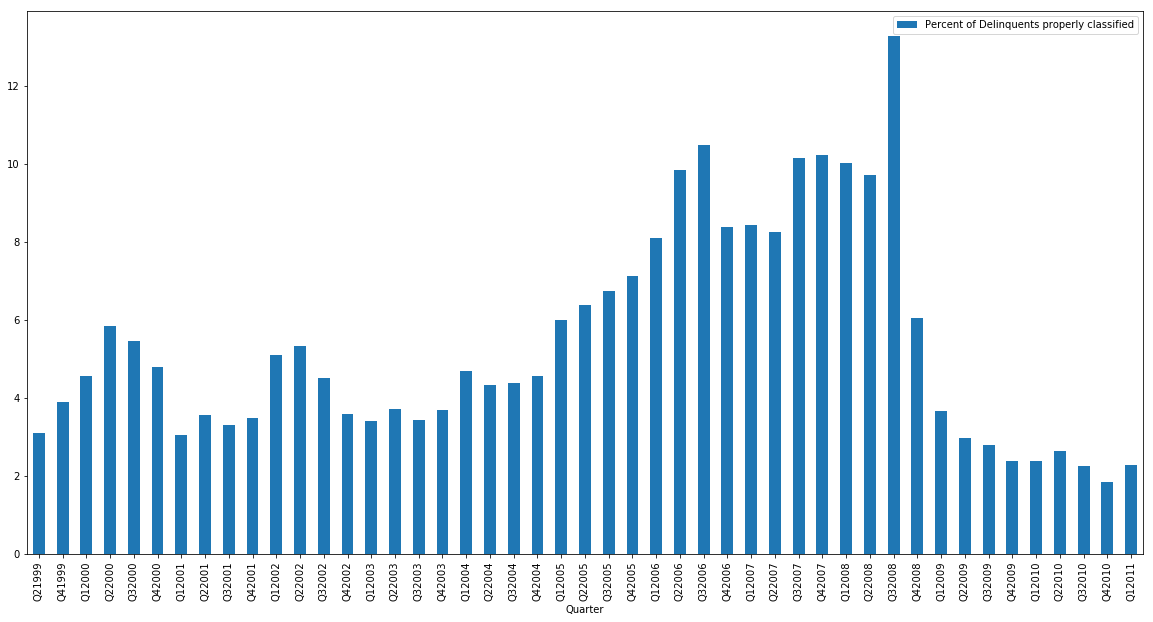

In [47]:
pd.DataFrame(evalmatrix_df['NumDelinquentsProperlyClassified']/evalmatrix_df['NumOfPredictedDelinquents']*100,columns=['Percent of Delinquents properly classified']).plot(kind='bar',figsize=((20,10)))
plt.show()

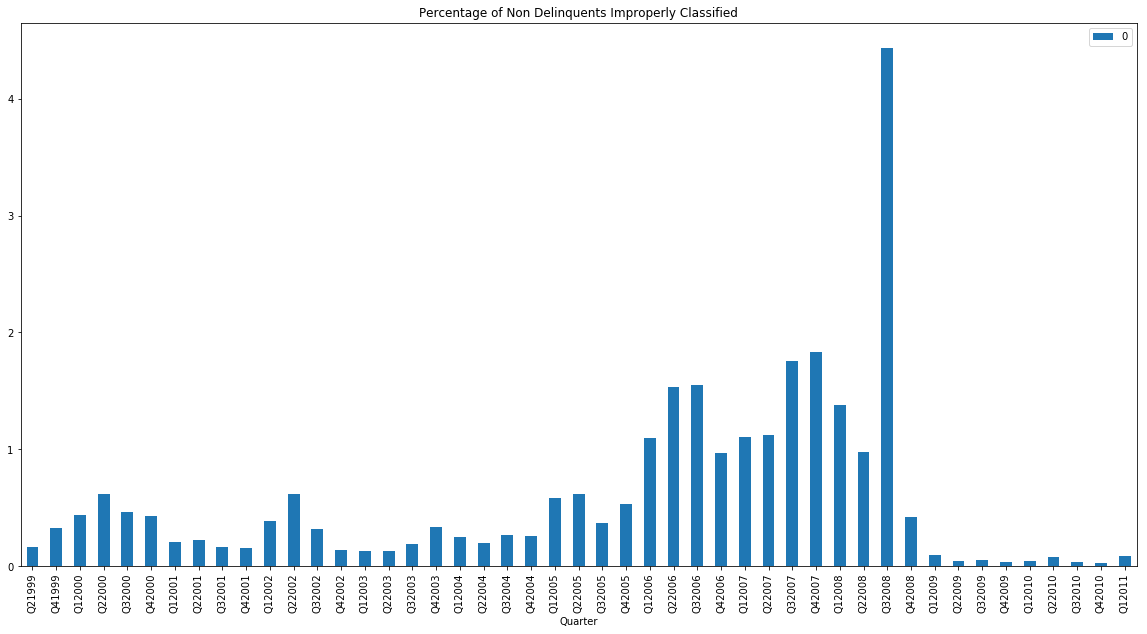

In [51]:
pd.DataFrame(100*evalmatrix_df['NumNonDelinquentsImproperlyClassified']/(evalmatrix_df['NumRecordsInDataset']-evalmatrix_df['NumActualDelinquents'])).plot(kind='bar',title='Percentage of Non Delinquents Improperly Classified',figsize=((20,10)))
plt.show()